<a href="https://colab.research.google.com/github/aditigawand/Time-Series-Analysis-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Basic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# connect the google drive with the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataanalytics/a10 .csv')
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [ ]:
# head() it displays the top rows
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
# tail() it displays the bottom  rows
df.tail()

,date,value
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


In [ ]:
# it displays numerical data each column
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [ ]:
df.dtypes

date      object
value    float64
dtype: object

In [ ]:
df['date'] = df['date'].astype('datetime64')
df = df.sort_values('date')
df.set_index('date', inplace=True)
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [ ]:
df.shape

(204, 1)

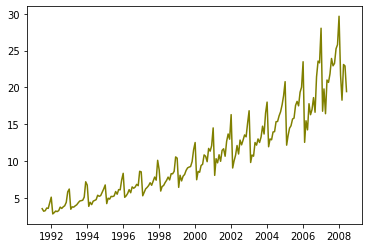

In [ ]:
plt.plot(df,color='olive')

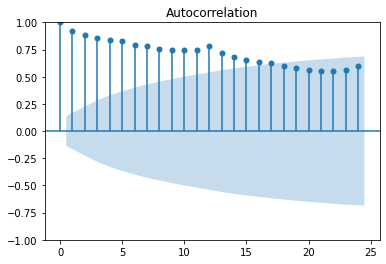

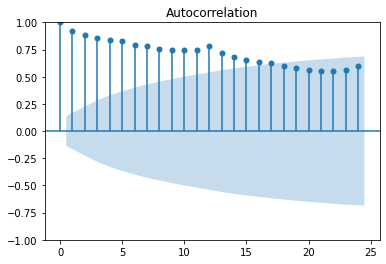

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf

plot_acf(df)

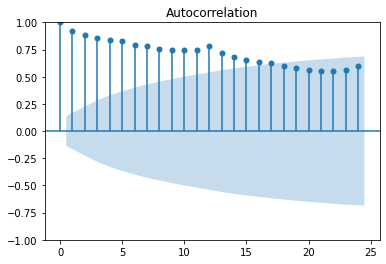

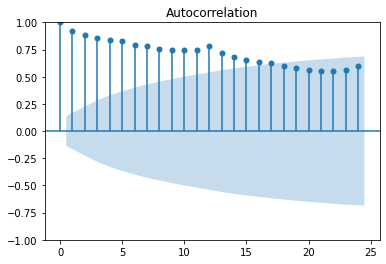

In [ ]:
plot_acf(df)

# ETS decomposition on the data

In [ ]:
# For liner data we us additive model

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive')
res = pd.DataFrame()
res['Trend'] = result.trend
res['Seaonality'] = result.seasonal
res['Residual'] = result.resid
res['Observed'] = result.observed
res['Actual'] = df.iloc[:, 0]
res.head()

,Trend,Seaonality,Residual,Observed,Actual
date,,,,,
1991-07-01,NaN,-0.227809,NaN,3.526591,3.526591
1991-08-01,NaN,-0.023116,NaN,3.180891,3.180891
1991-09-01,NaN,-0.149022,NaN,3.252221,3.252221
1991-10-01,NaN,0.569161,NaN,3.611003,3.611003
1991-11-01,NaN,0.966836,NaN,3.565869,3.565869


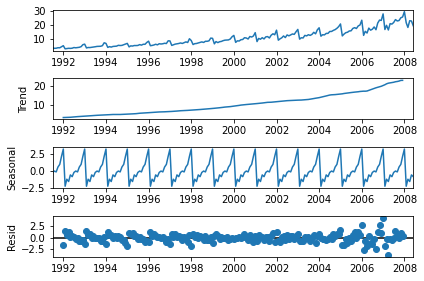

In [ ]:
import matplotlib.pyplot as plt
result.plot()
plt.show()

In [ ]:
# For Non liner data we us multiplicative model

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')
res = pd.DataFrame()
res['Trend'] = result.trend
res['Seaonality'] = result.seasonal
res['Residual'] = result.resid
res['Observed'] = result.observed
res['Actual'] = df.iloc[:, 0]
res.head()

,Trend,Seaonality,Residual,Observed,Actual
date,,,,,
1991-07-01,NaN,0.978509,NaN,3.526591,3.526591
1991-08-01,NaN,0.989722,NaN,3.180891,3.180891
1991-09-01,NaN,0.986418,NaN,3.252221,3.252221
1991-10-01,NaN,1.045509,NaN,3.611003,3.611003
1991-11-01,NaN,1.075573,NaN,3.565869,3.565869


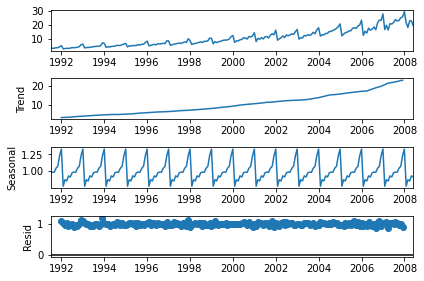

In [ ]:
import matplotlib.pyplot as plt
result.plot()
plt.show()

### LSTM

In [ ]:
# convert a dataframe into array
dataset=df.values
dataset[:5]

array([[3.526591],
       [3.180891],
       [3.252221],
       [3.611003],
       [3.565869]])

In [ ]:
# Normalize the data using MinMaxScaler (0to1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.02651951],
       [0.01364468],
       [0.01630121],
       [0.02966325],
       [0.02798233]])

In [ ]:
# Split data into train and test
train_size = int(len(dataset)*0.8)
train = dataset[:train_size]
test = dataset[train_size:]

In [ ]:
# change at data into x,y 
def create_dataset(dataset, lag):
    datax = []
    datay = []
    for i in range(len(dataset)-lag-1):
        a = dataset[i:i+lag, 0]
        datax.append(a)
        datay.append(dataset[i+lag, 0])
    return np.array(datax), np.array(datay)

In [ ]:
# set a lag value & create train data and test data
lag = 3
trainx, trainy = create_dataset(train, lag)
testx, testy = create_dataset(test, lag)

In [ ]:
# Our data have proper shape to pass in LSTM 
trainx = np.reshape(trainx, (trainx.shape[0], 1, 
                             trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [ ]:
trainx.shape

(159, 1, 3)

In [ ]:
# creat a model
model = Sequential()
model.add(LSTM(4, input_shape=(1, lag)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainx, trainy, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
159/159 - 3s - loss: 0.0168 - 3s/epoch - 18ms/step
Epoch 2/100
159/159 - 0s - loss: 0.0069 - 306ms/epoch - 2ms/step
Epoch 3/100
159/159 - 0s - loss: 0.0054 - 322ms/epoch - 2ms/step
Epoch 4/100
159/159 - 0s - loss: 0.0044 - 375ms/epoch - 2ms/step
Epoch 5/100
159/159 - 0s - loss: 0.0038 - 489ms/epoch - 3ms/step
Epoch 6/100
159/159 - 0s - loss: 0.0036 - 441ms/epoch - 3ms/step
Epoch 7/100
159/159 - 0s - loss: 0.0035 - 463ms/epoch - 3ms/step
Epoch 8/100
159/159 - 0s - loss: 0.0034 - 486ms/epoch - 3ms/step
Epoch 9/100
159/159 - 0s - loss: 0.0035 - 485ms/epoch - 3ms/step
Epoch 10/100
159/159 - 1s - loss: 0.0035 - 510ms/epoch - 3ms/step
Epoch 11/100
159/159 - 0s - loss: 0.0034 - 424ms/epoch - 3ms/step
Epoch 12/100
159/159 - 0s - loss: 0.0034 - 484ms/epoch - 3ms/step
Epoch 13/100
159/159 - 1s - loss: 0.0034 - 505ms/epoch - 3ms/step
Epoch 14/100
159/159 - 0s - loss: 0.0034 - 326ms/epoch - 2ms/step
Epoch 15/100
159/159 - 0s - loss: 0.0034 - 315ms/epoch - 2ms/step
Epoch 16/100
159/159 

In [ ]:
# make a prediction on train and test data 
trainpredict = model.predict(trainx)
testpredict = model.predict(testx)

2/2 [==============================] - 0s 8ms/step


In [ ]:
# Now we get predicted value in sacled form we want in actual value so we use inverse_transform 
trainpredict = scaler.inverse_transform(trainpredict)
trainy = scaler.inverse_transform([trainy])
testpredict = scaler.inverse_transform(testpredict)
testy = scaler.inverse_transform([testy])

In [ ]:
mean_squared_error(trainy[0], trainpredict[:,0])

2.115784004962335

In [ ]:
mean_squared_error(testy[0], testpredict[:,0])

12.533157207806246

In [ ]:
trainpredictplot=np.empty_like(dataset)
trainpredictplot[:,:] = np.nan
trainpredictplot[lag:len(trainpredict)+lag,:] = trainpredict

testpredictplot=np.empty_like(dataset)
testpredictplot[:,:] = np.nan
testpredictplot[len(trainpredict) + 2*lag+1:len(dataset)-1, :] = testpredict

In [ ]:
dataset = scaler.inverse_transform(dataset)

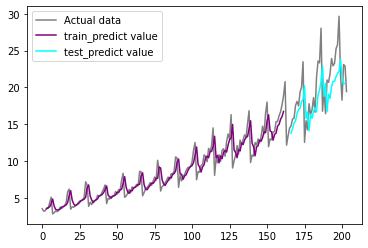

In [ ]:
#  Visualize Between predicted and actual value
plt.plot(dataset,color='gray', label="Actual data")
plt.plot(trainpredictplot ,color='purple',label="train_predict value")
plt.plot(testpredictplot ,color='cyan', label="test_predict value")
plt.legend()
plt.show()